In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
import pandas as pd
import random

# Data awal
base_data = {
    'Durasi_Fokus_menit': [2, 5, 3, 4, 6, 2, 4, 3, 5, 4],
    'Respon_Suara': ['Lambat', 'Cepat', 'Sedang', 'Lambat', 'Cepat', 'Cepat', 'Sedang', 'Lambat', 'Cepat', 'Sedang'],
    'Aktivitas_Fisik': ['Diam', 'Bergerak', 'Diam', 'Bergerak', 'Bergerak', 'Diam', 'Diam', 'Bergerak', 'Diam', 'Bergerak'],
    'Kategori': ['Kesulitan Fokus', 'Hyperactive', 'Sensitivitas Suara', 'Kesulitan Fokus', 'Hyperactive', 'Sensitivitas Suara',
                 'Kesulitan Fokus', 'Hyperactive', 'Sensitivitas Suara', 'Kesulitan Fokus'],
    'Rekomendasi_Kegiatan': [
        'Coba kegiatan tenang, seperti membaca buku pendek atau menggambar.',
        'Aktivitas fisik seperti lompat tali atau bermain bola.',
        'Mainkan alat musik yang lembut atau aktivitas mendengarkan suara alam.',
        'Kegiatan interaktif dengan waktu singkat, seperti puzzle atau blok.',
        'Aktivitas luar seperti berlari atau bermain di taman.',
        'Cobalah aktivitas yoga atau meditasi ringan.',
        'Aktivitas yang membutuhkan fokus rendah, seperti menyusun balok.',
        'Aktivitas fisik dengan fokus ringan, seperti bermain bola atau lompat tali.',
        'Musik lembut atau mendengarkan cerita yang tenang.',
        'Aktivitas yang mendorong perhatian pada detail, seperti melukis atau merakit mainan.'
    ]
}

# Fungsi untuk menghasilkan dataset besar
def generate_large_dataset(base_data, num_samples):
    data = {
        'Durasi_Fokus_menit': [],
        'Respon_Suara': [],
        'Aktivitas_Fisik': [],
        'Kategori': [],
        'Rekomendasi_Kegiatan': []
    }

    for _ in range(num_samples):
        idx = random.randint(0, len(base_data['Durasi_Fokus_menit']) - 1)
        data['Durasi_Fokus_menit'].append(random.randint(2, 10))  # Variasi durasi fokus
        data['Respon_Suara'].append(base_data['Respon_Suara'][idx])
        data['Aktivitas_Fisik'].append(base_data['Aktivitas_Fisik'][idx])
        data['Kategori'].append(base_data['Kategori'][idx])
        data['Rekomendasi_Kegiatan'].append(base_data['Rekomendasi_Kegiatan'][idx])

    return data

data_100 = generate_large_dataset(base_data, 100)

df = pd.DataFrame(data_100)

df.to_csv('dataset_perilaku_anak_100.csv', index=False, sep=',')

print("Dataset berhasil disimpan dalam file 'dataset_perilaku_anak_100.csv'")


Dataset berhasil disimpan dalam file 'dataset_perilaku_anak_100.csv'


In [ ]:
df = pd.read_csv('/content/dataset_perilaku_anak_100.csv')
df

,Durasi_Fokus_menit,Respon_Suara,Aktivitas_Fisik,Kategori,Rekomendasi_Kegiatan
0,2,Sedang,Diam,Kesulitan Fokus,"Aktivitas yang membutuhkan fokus rendah, seper..."
1,8,Sedang,Diam,Kesulitan Fokus,"Aktivitas yang membutuhkan fokus rendah, seper..."
2,9,Sedang,Bergerak,Kesulitan Fokus,Aktivitas yang mendorong perhatian pada detail...
3,6,Cepat,Diam,Sensitivitas Suara,Cobalah aktivitas yoga atau meditasi ringan.
4,5,Sedang,Diam,Sensitivitas Suara,Mainkan alat musik yang lembut atau aktivitas ...
...,...,...,...,...,...
95,2,Cepat,Bergerak,Hyperactive,Aktivitas luar seperti berlari atau bermain di...
96,9,Cepat,Diam,Sensitivitas Suara,Musik lembut atau mendengarkan cerita yang ten...
97,3,Cepat,Diam,Sensitivitas Suara,Musik lembut atau mendengarkan cerita yang ten...
98,3,Cepat,Bergerak,Hyperactive,Aktivitas fisik seperti lompat tali atau berma...


##1. Data Understanding

In [ ]:
print('data shape :', df.shape)

data shape : (100, 5)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Durasi_Fokus_menit    100 non-null    int64 
 1   Respon_Suara          100 non-null    object
 2   Aktivitas_Fisik       100 non-null    object
 3   Kategori              100 non-null    object
 4   Rekomendasi_Kegiatan  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [ ]:
df.describe()

,Durasi_Fokus_menit
count,100.000000
mean,6.040000
std,2.550183
min,2.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,10.000000


In [ ]:
df.Kategori.value_counts()

,count
Kategori,
Sensitivitas Suara,35
Kesulitan Fokus,34
Hyperactive,31


##2. Data Cleaning

In [ ]:
df.isnull().sum()

,0
Durasi_Fokus_menit,0
Respon_Suara,0
Aktivitas_Fisik,0
Kategori,0
Rekomendasi_Kegiatan,0


In [ ]:
df.duplicated().sum()

37

In [ ]:
df_cleaned = df.drop_duplicates()

print("Jumlah data sebelum:", len(df))
print("Jumlah data sesudah:", len(df_cleaned))

Jumlah data sebelum: 100
Jumlah data sesudah: 63


##3. Exploratory Data Analysis(EDA)

In [ ]:
print(df['Respon_Suara'].value_counts())
print(df['Aktivitas_Fisik'].value_counts())
print(df['Kategori'].value_counts())

Respon_Suara
Cepat     50
Sedang    26
Lambat    24
Name: count, dtype: int64
Aktivitas_Fisik
Diam        53
Bergerak    47
Name: count, dtype: int64
Kategori
Sensitivitas Suara    35
Kesulitan Fokus       34
Hyperactive           31
Name: count, dtype: int64


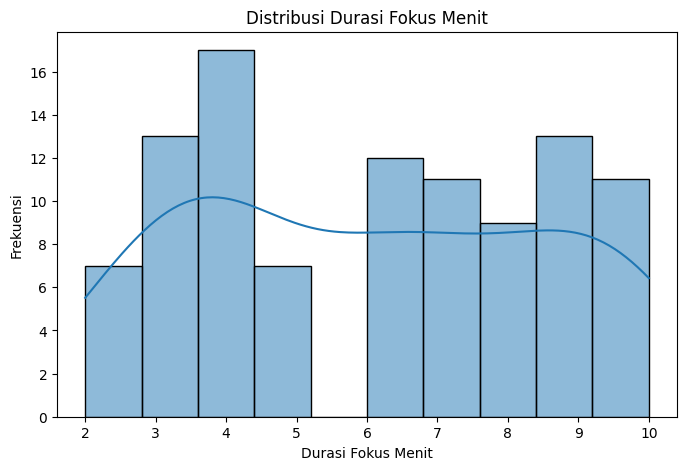

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Durasi_Fokus_menit'], kde=True, bins=10)
plt.title('Distribusi Durasi Fokus Menit')
plt.xlabel('Durasi Fokus Menit')
plt.ylabel('Frekuensi')
plt.show()

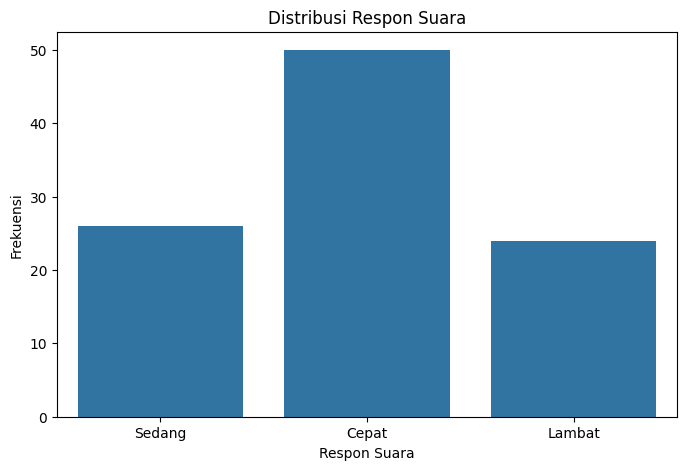

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Respon_Suara', data=df)
plt.title('Distribusi Respon Suara')
plt.xlabel('Respon Suara')
plt.ylabel('Frekuensi')
plt.show()

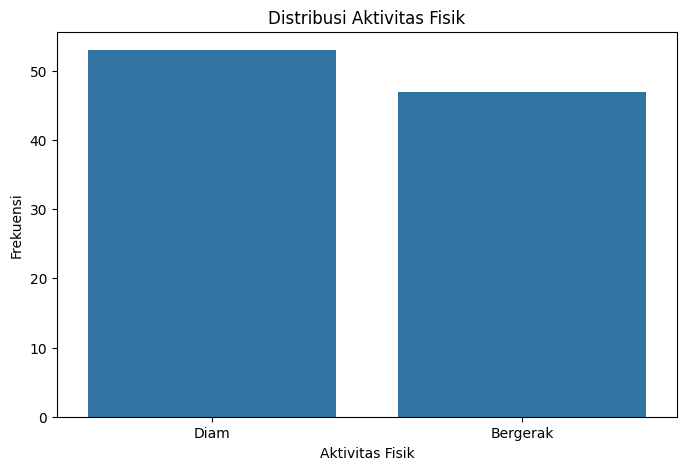

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Aktivitas_Fisik', data=df)
plt.title('Distribusi Aktivitas Fisik')
plt.xlabel('Aktivitas Fisik')
plt.ylabel('Frekuensi')
plt.show()

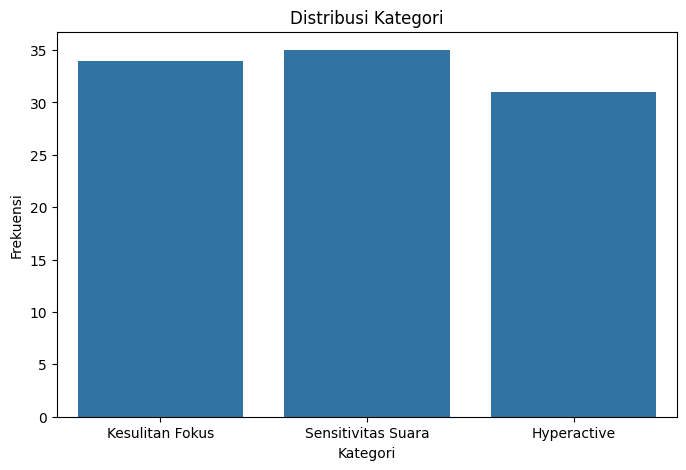

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Kategori', data=df)
plt.title('Distribusi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.show()

##4. Preprocessing Data

In [ ]:
df.head()

,Durasi_Fokus_menit,Respon_Suara,Aktivitas_Fisik,Kategori,Rekomendasi_Kegiatan
0,2,Sedang,Diam,Kesulitan Fokus,"Aktivitas yang membutuhkan fokus rendah, seper..."
1,8,Sedang,Diam,Kesulitan Fokus,"Aktivitas yang membutuhkan fokus rendah, seper..."
2,9,Sedang,Bergerak,Kesulitan Fokus,Aktivitas yang mendorong perhatian pada detail...
3,6,Cepat,Diam,Sensitivitas Suara,Cobalah aktivitas yoga atau meditasi ringan.
4,5,Sedang,Diam,Sensitivitas Suara,Mainkan alat musik yang lembut atau aktivitas ...


In [ ]:
#mengubah type object menjadi integer
from sklearn.preprocessing import LabelEncoder

le_respon_suara = LabelEncoder()
le_aktivitas_fisik = LabelEncoder()
le_kategori = LabelEncoder()
le_rekomendasi = LabelEncoder()

df['Respon_Suara'] = le_respon_suara.fit_transform(df['Respon_Suara'])
df['Aktivitas_Fisik'] = le_aktivitas_fisik.fit_transform(df['Aktivitas_Fisik'])
df['Kategori'] = le_kategori.fit_transform(df['Kategori'])
df['Rekomendasi_Kegiatan'] = le_rekomendasi.fit_transform(df['Rekomendasi_Kegiatan'])

In [ ]:
df.head()

,Durasi_Fokus_menit,Respon_Suara,Aktivitas_Fisik,Kategori,Rekomendasi_Kegiatan
0,2,2,1,1,3
1,8,2,1,1,3
2,9,2,0,1,4
3,6,0,1,2,6
4,5,2,1,2,8


###Splitting Data

In [ ]:
#splitting data

# variabel x menyimpan nilai selain kategori
x = df.drop(columns = ['Kategori', 'Rekomendasi_Kegiatan'])
# sedangkan y menyimpan nilai kategori
y = df['Kategori']

print('x : ', x.shape)
print('y : ', y.shape)

x :  (100, 3)
y :  (100,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (80, 3)
y_train : (80,)
x_test : (20, 3)
y_test : (20,)


In [ ]:
#inisialisasi KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

#melihat akurasi nilai model
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.60      0.75        10
           2       0.70      1.00      0.82         7

    accuracy                           0.80        20
   macro avg       0.82      0.87      0.81        20
weighted avg       0.86      0.80      0.79        20

Akurasi KNN : 80.00%


In [ ]:
testing = {
    'Durasi_Fokus_menit': [2],
    'Respon_Suara': [1],
    'Aktivitas_Fisik': [0],
}
testing = pd.DataFrame(testing)
testing

,Durasi_Fokus_menit,Respon_Suara,Aktivitas_Fisik
0,2,1,0


In [ ]:
# Prediksi kategori anak baru
predicted_category = knn.predict(testing)
print(f'Hasil prediksi kategori (numerik): {predicted_category[0]}')

# Decode kategori
kategori_map = {0: 'Kesulitan Fokus', 1: 'Hyperactive', 2: 'Sensitivitas Suara'}
decoded_category = kategori_map[predicted_category[0]]
print(f'Kategori anak baru (decoded): {decoded_category}')

Hasil prediksi kategori (numerik): 0
Kategori anak baru (decoded): Kesulitan Fokus


In [ ]:
# Rekomendasi kegiatan (mapping untuk rekomendasi kegiatan berdasarkan kategori)
recomendations = {
    0: "Coba kegiatan tenang, seperti membaca buku pendek atau menggambar.",
    1: "Aktivitas fisik seperti lompat tali atau bermain bola.",
    2: "Mainkan alat musik yang lembut atau aktivitas mendengarkan suara alam.",
    3: 'Kegiatan interaktif dengan waktu singkat, seperti puzzle atau blok.',
    4: 'Aktivitas luar seperti berlari atau bermain di taman.',
    5: 'Cobalah aktivitas yoga atau meditasi ringan.',
    6: 'Aktivitas yang membutuhkan fokus rendah, seperti menyusun balok.',
    7: 'Aktivitas fisik dengan fokus ringan, seperti bermain bola atau lompat tali.',
    8: 'Musik lembut atau mendengarkan cerita yang tenang.',
    9: 'Aktivitas yang mendorong perhatian pada detail, seperti melukis atau merakit mainan.'
}

# Menampilkan rekomendasi
print(f'Rekomendasi kegiatan: {recomendations[predicted_category[0]]}')


Rekomendasi kegiatan: Coba kegiatan tenang, seperti membaca buku pendek atau menggambar.
